In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, auc
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegressionCV
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.feature_selection import RFECV
from sklearn.model_selection import GridSearchCV
#%run -i 'functions.py'
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score
from pprint import pprint
from sklearn.metrics import confusion_matrix
import itertools
from imblearn.over_sampling import SMOTE

In [2]:
pd.set_option('display.max_columns', None)
master = pd.read_csv('final_data.csv')
master.head()

,Unnamed: 0,accident_severity,number_of_vehicles,number_of_casualties,day_of_week,time,road_class,road_type,speed_limit,junction_control,crossguard,ped_crossway,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,road_hazard,urban_or_rural_area,did_police_officer_attend_scene_of_accident,coordinates,vehicle_type,trailer,vehicle_activity,in_restricted_lane,vehicle_action,vehicle_loc_post_impact,impact_type,was_vehicle_left_hand_drive?,journey_purpose_of_driver,sex_of_driver,age_driver,age_bin_driver,propulsion,age_of_vehicle,socioeconomic_status,driver_residence,car_status,season
0,0,minor,2,1,Monday,midnight,A_road,single_lane,20,yield,0,ped_light,1,clear,1,0,0,1,1,"(51.529746, -0.102474)",taxi,0,turn_left,0,none,on_road,front,1,work,1,40,7,hybrid/electric,6,low,city,poor,winter
1,1,severe,2,1,Monday,late_night,B_road,two_lane,30,traffic_light,0,ped_light,1,rain,0,0,0,1,1,"(51.530179, 0.037828)",car,0,turn_right,0,none,on_road,front,1,Unknown,1,27,6,petrol,1,middle,city,good,winter
2,2,severe,2,1,Monday,early_morning,C_road,single_lane,30,yield,0,none,1,clear,1,0,0,1,1,"(51.514545, -0.199239)",taxi,0,exiting,0,none,on_road,front,1,work,1,66,10,electric,5,low,city,poor,winter
3,3,minor,3,1,Monday,early_morning,A_road,one_way,30,yield,0,none,1,clear,1,0,0,1,1,"(51.475091, -0.032886)",taxi,0,driving,0,none,on_road,back,1,work,2,36,7,hybrid/electric,2,low,city,poor,winter
4,4,minor,2,1,Monday,midnight,Unclassified,single_lane,30,yield,0,cross_walk,1,clear,1,0,0,1,1,"(51.56325, -0.311872)",car,0,turn_right,0,none,on_road,front,1,Unknown,1,24,5,petrol,9,low,city,okay,winter


In [3]:
master.drop(['Unnamed: 0'],axis=1 , inplace=True)

In [4]:
master['accident_severity'] = pd.factorize(master['accident_severity'])[0]+1
master['day_of_week'] = pd.factorize(master['day_of_week'])[0]+1
master['time'] = pd.factorize(master['time'])[0]+1
master['road_class'] = pd.factorize(master['road_class'])[0]+1
master['junction_control'] = pd.factorize(master['junction_control'])[0]+1
master['ped_crossway'] = pd.factorize(master['ped_crossway'])[0]+1
master['weather_conditions'] = pd.factorize(master['weather_conditions'])[0]+1
master['vehicle_type'] = pd.factorize(master['vehicle_type'])[0]+1
master['vehicle_activity'] = pd.factorize(master['accident_severity'])[0]+1
master['vehicle_action'] = pd.factorize(master['vehicle_action'])[0]+1
master['vehicle_loc_post_impact'] = pd.factorize(master['accident_severity'])[0]+1
master['impact_type'] = pd.factorize(master['impact_type'])[0]+1
master['journey_purpose_of_driver'] = pd.factorize(master['journey_purpose_of_driver'])[0]+1
master['propulsion'] = pd.factorize(master['propulsion'])[0]+1
master['socioeconomic_status'] = pd.factorize(master['socioeconomic_status'])[0]+1
master['driver_residence'] = pd.factorize(master['driver_residence'])[0]+1
master['car_status'] = pd.factorize(master['car_status'])[0]+1
master['season'] = pd.factorize(master['season'])[0]+1
master['road_type'] = pd.factorize(master['road_type'])[0]+1

In [5]:
master.drop(['coordinates', 'age_bin_driver'],axis=1 , inplace=True)

In [6]:
df = master
df

,accident_severity,number_of_vehicles,number_of_casualties,day_of_week,time,road_class,road_type,speed_limit,junction_control,crossguard,ped_crossway,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,road_hazard,urban_or_rural_area,did_police_officer_attend_scene_of_accident,vehicle_type,trailer,vehicle_activity,in_restricted_lane,vehicle_action,vehicle_loc_post_impact,impact_type,was_vehicle_left_hand_drive?,journey_purpose_of_driver,sex_of_driver,age_driver,propulsion,age_of_vehicle,socioeconomic_status,driver_residence,car_status,season
0,1,2,1,1,1,1,1,20,1,0,1,1,1,1,0,0,1,1,1,0,1,0,1,1,1,1,1,1,40,1,6,1,1,1,1
1,2,2,1,1,2,2,2,30,2,0,1,1,2,0,0,0,1,1,2,0,2,0,1,2,1,1,2,1,27,2,1,2,1,2,1
2,2,2,1,1,3,3,1,30,1,0,2,1,1,1,0,0,1,1,1,0,2,0,1,2,1,1,1,1,66,3,5,1,1,1,1
3,1,3,1,1,3,1,3,30,1,0,2,1,1,1,0,0,1,1,1,0,1,0,1,1,2,1,1,2,36,1,2,1,1,1,1
4,1,2,1,1,1,4,1,30,1,0,3,1,1,1,0,0,1,1,2,0,1,0,1,1,1,1,2,1,24,2,9,1,1,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67561,2,3,4,6,7,1,1,50,1,0,2,1,1,1,0,0,2,1,2,0,2,0,1,2,3,1,2,1,57,3,12,1,1,1,4
67562,1,4,3,7,9,1,1,50,1,0,2,0,1,1,0,0,2,1,2,0,1,0,1,1,2,1,2,1,30,2,11,1,1,1,4
67563,1,2,1,7,6,1,1,60,1,0,2,0,1,1,0,0,2,1,2,0,1,0,2,1,1,1,2,1,49,3,5,1,1,1,4
67564,1,1,1,3,1,1,1,60,1,0,2,1,1,0,0,0,2,1,2,0,1,0,3,1,1,1,2,1,37,2,6,1,1,3,4


In [7]:
X = df.drop(columns=['accident_severity'], axis=1)
y = df['accident_severity']

# Evaluating feature importance



Identified Vehicle post impact and activity highly influenced 

[1.09838453e-03 7.32635509e-04 4.59661206e-04 4.72024876e-04
 3.93096412e-04 8.28344810e-04 6.79202186e-04 2.69540884e-04
 6.65532602e-05 2.54124352e-04 3.44287808e-04 2.18502579e-04
 2.69031446e-04 9.67079744e-05 1.26254841e-04 7.83677901e-04
 1.61730200e-03 3.08293874e-03 1.28908083e-04 4.94891585e-01
 1.40906317e-04 7.30424760e-04 4.87050886e-01 7.00368513e-04
 3.50415835e-05 8.97537953e-04 7.57408313e-04 5.85236604e-04
 5.25188326e-04 5.15654025e-04 2.56310794e-04 3.12809649e-04
 3.17426339e-04 3.62037028e-04]


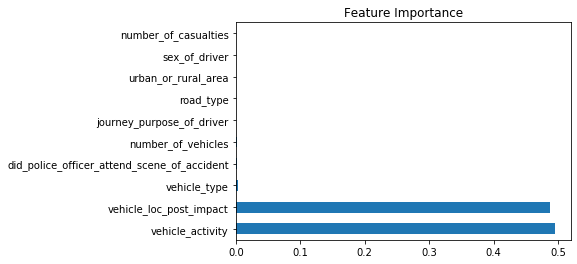

In [126]:
import pandas as pd
import numpy as np
data = master
X = df.drop(columns=['accident_severity'], axis=1)
y = df['accident_severity']
X_r, y_r = SMOTE().fit_sample(X, y)
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.title('Feature Importance')
plt.savefig('graph9.png',dpi=None,bbox_inches = 'tight')
plt.show()

In [9]:
X = df.drop(columns=['accident_severity','vehicle_loc_post_impact','vehicle_activity'], axis=1)
y = df['accident_severity']
X_r, y_r = SMOTE().fit_sample(X, y)
X_train, X_test, y_train, y_test = train_test_split(X_r, y_r, test_size=0.2, random_state=42)

In [10]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Greens):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion Matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# KNN

In [11]:
knn = KNeighborsClassifier(n_neighbors=1)

In [12]:
knn

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [13]:
scaler = StandardScaler()  
scaler.fit(X_train)

X_trainK = scaler.transform(X_train)  
X_testK = scaler.transform(X_test)  


model = KNeighborsClassifier(n_neighbors=1)
model.fit(X_trainK, y_train)

y_pred = model.predict(X_test)

In [14]:
print(metrics.confusion_matrix(y_test, y_pred))

[[8167 2316  385]
 [8487 2232  289]
 [8586 1967  503]]


In [15]:
y_test.value_counts()

3    11056
2    11008
1    10868
Name: accident_severity, dtype: int64

In [16]:
cm = confusion_matrix(y_test,y_pred)
classes = ['Slight', 'Serious','Fatal']

Confusion Matrix, without normalization
[[8167 2316  385]
 [8487 2232  289]
 [8586 1967  503]]


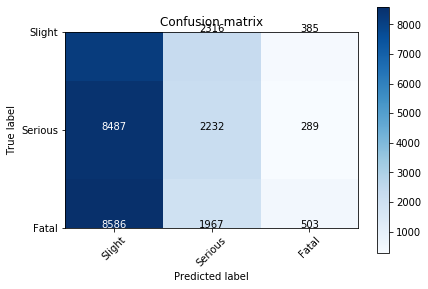

In [17]:
plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues)

In [18]:
 from sklearn.metrics import f1_score

In [19]:
data = { 
    'Micro': [ 
precision_score(y_test, y_pred, 
                                           pos_label='positive',
                                           average='micro'),
recall_score(y_test, y_pred, 
                                           pos_label='positive',
                                           average='micro'),
f1_score(y_test, y_pred, 
                                           pos_label='positive',
                                           average='micro')],
    
    'Macro': [
        precision_score(y_test, y_pred, 
                                           pos_label='positive',
                                           average='macro'),
recall_score(y_test, y_pred, 
                                           pos_label='positive',
                                           average='macro'),
f1_score(y_test, y_pred, 
                                           pos_label='positive',
                                           average='macro')],
    'Weighted':[
   precision_score(y_test, y_pred, 
                                           pos_label='positive',
                                           average='weighted'),
recall_score(y_test, y_pred, 
                                           pos_label='positive',
                                           average='weighted'),
f1_score(y_test, y_pred, 
                                           pos_label='positive',
                                           average='weighted')]}
    
pd.DataFrame(data,
                  index=pd.Index(['Precison', 'Recall', 'F1 SCore', ], ),
                  columns=pd.Index(['Micro', 'Macro', 'Weighted'],))    

,Micro,Macro,Weighted
Precison,0.331046,0.364508,0.364774
Recall,0.331046,0.333243,0.331046
F1 SCore,0.331046,0.263118,0.262049


In [20]:
# search for an optimal value of K for KNN
k_range = list(range(1, 11))
k_scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_predict = knn.predict(X_test)
    score = f1_score(y_test, y_predict, average='weighted')
    k_scores.append( score)
print(k_scores)

[0.8632628312522991, 0.889371831218234, 0.8283362728111974, 0.8508593490617149, 0.8068273637317742, 0.8236313860805055, 0.7887020123740924, 0.8045974272372503, 0.7753945718716849, 0.7859553460932174]


# Hypertuning N-Neighbor

In [21]:
# scaler = StandardScaler()  
# scaler.fit(X_train)

X_trainK = scaler.transform(X_train)  
X_testK = scaler.transform(X_test)  


model2 = KNeighborsClassifier(n_neighbors=9)
model2.fit(X_train, y_train)

y_pred = model2.predict(X_test)

In [22]:
print(metrics.confusion_matrix(y_test, y_pred))

[[ 4932  4725  1211]
 [  470 10156   382]
 [    0     4 11052]]


In [23]:
cm1 = confusion_matrix(y_test,y_pred)
classes = ['Slight', 'Serious','Fatal']

Confusion Matrix, without normalization
[[ 4932  4725  1211]
 [  470 10156   382]
 [    0     4 11052]]


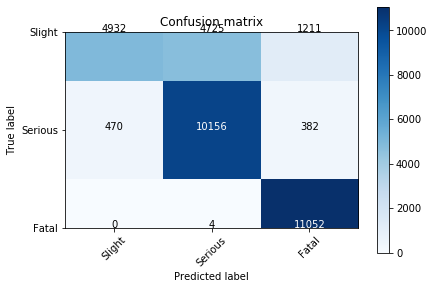

In [24]:
plot_confusion_matrix(cm1, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues)

In [25]:
data = { 
    'Micro': [ 
precision_score(y_test, y_pred, 
                                           pos_label='positive',
                                           average='micro'),
recall_score(y_test, y_pred, 
                                           pos_label='positive',
                                           average='micro'),
f1_score(y_test, y_pred, 
                                           pos_label='positive',
                                           average='micro')],
    
    'Macro': [
        precision_score(y_test, y_pred, 
                                           pos_label='positive',
                                           average='macro'),
recall_score(y_test, y_pred, 
                                           pos_label='positive',
                                           average='macro'),
f1_score(y_test, y_pred, 
                                           pos_label='positive',
                                           average='macro')],
    'Weighted':[
   precision_score(y_test, y_pred, 
                                           pos_label='positive',
                                           average='weighted'),
recall_score(y_test, y_pred, 
                                           pos_label='positive',
                                           average='weighted'),
f1_score(y_test, y_pred, 
                                           pos_label='positive',
                                           average='weighted')]}
    
pd.DataFrame(data,
                  index=pd.Index(['Precison', 'Recall', 'F1 SCore', ], ),
                  columns=pd.Index(['Micro', 'Macro', 'Weighted'],))    

,Micro,Macro,Weighted
Precison,0.793757,0.823105,0.822797
Recall,0.793757,0.792016,0.793757
F1 SCore,0.793757,0.774449,0.775395


As seen, by raising the N-Neighbor our results improved all around. 
A higher K provides more observations in each predictio. This results in a lower variance but increase of bias. 

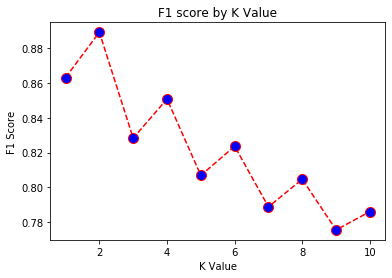

In [56]:
plt.plot(range(1, 11), k_scores, color='red', linestyle='dashed', marker='o',  
         markerfacecolor='blue', markersize=10)
plt.title('F1 score by K Value')  
plt.xlabel('K Value')  
plt.ylabel('F1 Score') 


plt.savefig('graph10.png',dpi=None,bbox_inches = 'tight')
plt.show()

Based on the graph I altered my K value to 2 

In [57]:
X_trainK = scaler.transform(X_train)  
X_testK = scaler.transform(X_test)  


model2 = KNeighborsClassifier(n_neighbors=2)
model2.fit(X_train, y_train)

y_pred = model2.predict(X_test)

In [58]:
print(metrics.confusion_matrix(y_test, y_pred))

[[ 7944  2506   418]
 [  599 10374    35]
 [    0     2 11054]]


In [59]:
cm1 = confusion_matrix(y_test,y_pred)
classes = ['Slight', 'Serious','Fatal']

Confusion Matrix, without normalization
[[ 7944  2506   418]
 [  599 10374    35]
 [    0     2 11054]]


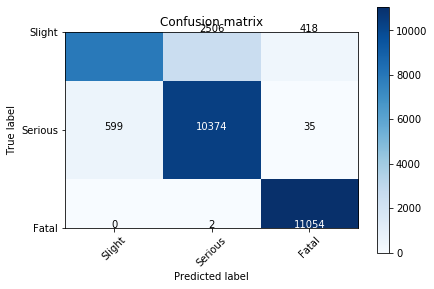

In [60]:
plot_confusion_matrix(cm1, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues)

In [61]:
data = { 
    'Micro': [ 
precision_score(y_test, y_pred, 
                                           pos_label='positive',
                                           average='micro'),
recall_score(y_test, y_pred, 
                                           pos_label='positive',
                                           average='micro'),
f1_score(y_test, y_pred, 
                                           pos_label='positive',
                                           average='micro')],
    
    'Macro': [
        precision_score(y_test, y_pred, 
                                           pos_label='positive',
                                           average='macro'),
recall_score(y_test, y_pred, 
                                           pos_label='positive',
                                           average='macro'),
f1_score(y_test, y_pred, 
                                           pos_label='positive',
                                           average='macro')],
    'Weighted':[
   precision_score(y_test, y_pred, 
                                           pos_label='positive',
                                           average='weighted'),
recall_score(y_test, y_pred, 
                                           pos_label='positive',
                                           average='weighted'),
f1_score(y_test, y_pred, 
                                           pos_label='positive',
                                           average='weighted')]}
    
pd.DataFrame(data,
                  index=pd.Index(['Precison', 'Recall', 'F1 Score', ], ),
                  columns=pd.Index(['Micro', 'Macro', 'Weighted'],))    

,Micro,Macro,Weighted
Precison,0.891898,0.898609,0.898566
Recall,0.891898,0.891059,0.891898
F1 SCore,0.891898,0.888940,0.889372


# XGBoost

In [28]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

In [29]:

#X_trainX, X_testX, y_trainX, y_testX = train_test_split(X_r, y_r, test_size=0.2, random_state=1)

In [73]:
xgb = XGBClassifier(n_jobs = 3)
xgb

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=3,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [74]:

# xgb = XGBClassifier(n_jobs = -1)
xgb.fit(X_train,y_train)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=3,
              nthread=None, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [77]:
#xgb.fit(X_train, y_train)
prediction = xgb.predict(X_test)

In [78]:
print(metrics.confusion_matrix(y_test, prediction))

[[8107 1892  869]
 [2546 5306 3156]
 [ 481 1660 8915]]


In [79]:
y_train.value_counts()

1    44018
2    43878
3    43830
Name: accident_severity, dtype: int64

In [80]:
from sklearn import metrics
print(metrics.accuracy_score(y_test,prediction))

0.678003158022592


In [81]:
# print the first 25 true and predicted responses
print('True:', y_test.values[0:25])
print('Pred:', prediction[0:25])

True: [2 1 1 3 3 1 1 1 3 1 2 2 2 3 2 1 3 3 2 1 2 3 1 3 2]
Pred: [2 2 1 3 3 1 1 1 3 2 3 1 3 3 3 1 3 2 2 1 2 3 2 3 3]


In [82]:
cm2 = confusion_matrix(y_test,prediction)
classes = ['Slight', 'Serious','Fatal']

Confusion Matrix, without normalization
[[8107 1892  869]
 [2546 5306 3156]
 [ 481 1660 8915]]


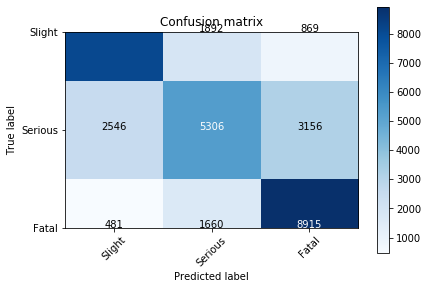

In [83]:
plot_confusion_matrix(cm2, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues)

In [84]:
data = { 
    'Micro': [ 
precision_score(y_test, prediction, 
                                           pos_label='positive',
                                           average='micro'),
recall_score(y_test, prediction, 
                                           pos_label='positive',
                                           average='micro'),
f1_score(y_test, prediction, 
                                           pos_label='positive',
                                           average='micro')],
    
    'Macro': [
        precision_score(y_test, prediction, 
                                           pos_label='positive',
                                           average='macro'),
recall_score(y_test,prediction, 
                                           pos_label='positive',
                                           average='macro'),
f1_score(y_test, prediction, 
                                           pos_label='positive',
                                           average='macro')],
    'Weighted':[
   precision_score(y_test, prediction, 
                                           pos_label='positive',
                                           average='weighted'),
recall_score(y_test, prediction, 
                                           pos_label='positive',
                                           average='weighted'),
f1_score(y_test, prediction, 
                                           pos_label='positive',
                                           average='weighted')]}
    
pd.DataFrame(data,
                  index=pd.Index(['Precison', 'Recall', 'F1 SCore', ], ),
                  columns=pd.Index(['Micro', 'Macro', 'Weighted'],))    

,Micro,Macro,Weighted
Precison,0.678003,0.672029,0.671815
Recall,0.678003,0.678105,0.678003
F1 SCore,0.678003,0.671384,0.671210


In [91]:
best_XGB = XGBClassifier(learning_rate=0.1,
    n_estimators=1000,
    max_depth=5,
    min_child_weight=1,
    gamma=0,
    subsample=0.8,
    colsample_bytree=0.8,
    objective='multi:softmax',
    nthread=4,
    scale_pos_weight=1,
    seed=27,
    num_class=3,)

In [92]:
best_XGB.fit(X_train, y_train)
prediction = best_XGB.predict(X_test)

In [93]:
print(metrics.confusion_matrix(y_test, prediction))

[[ 9056  1657   155]
 [ 2214  8113   681]
 [   90   168 10798]]


In [94]:
cm3 = confusion_matrix(y_test,prediction)
classes = ['Slight', 'Serious','Fatal']

Confusion Matrix, without normalization
[[ 9056  1657   155]
 [ 2214  8113   681]
 [   90   168 10798]]


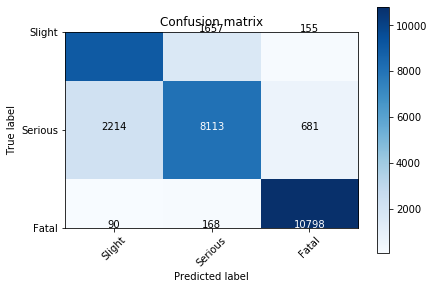

In [95]:
plot_confusion_matrix(cm3, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues)

In [96]:
data = { 
    'Micro': [ 
precision_score(y_test, prediction, 
                                           pos_label='positive',
                                           average='micro'),
recall_score(y_test, prediction, 
                                           pos_label='positive',
                                           average='micro'),
f1_score(y_test, prediction, 
                                           pos_label='positive',
                                           average='micro')],
    
    'Macro': [
        precision_score(y_test, prediction, 
                                           pos_label='positive',
                                           average='macro'),
recall_score(y_test,prediction, 
                                           pos_label='positive',
                                           average='macro'),
f1_score(y_test, prediction, 
                                           pos_label='positive',
                                           average='macro')],
    'Weighted':[
   precision_score(y_test, prediction, 
                                           pos_label='positive',
                                           average='weighted'),
recall_score(y_test, prediction, 
                                           pos_label='positive',
                                           average='weighted'),
f1_score(y_test, prediction, 
                                           pos_label='positive',
                                           average='weighted')]}
    
pd.DataFrame(data,
                  index=pd.Index(['Precison', 'Recall', 'F1 SCore', ], ),
                  columns=pd.Index(['Micro', 'Macro', 'Weighted'],))    

,Micro,Macro,Weighted
Precison,0.849235,0.847229,0.847559
Recall,0.849235,0.848982,0.849235
F1 SCore,0.849235,0.847091,0.847380


In [115]:
params = {
          'num_class' : [1,3,5],
        'min_child_weight': [1, 5, 7],
        'gamma': [0.5, 1, 1.5, 2, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5]
        }

In [120]:
# grid = GridSearchCV(estimator=best_XGB, param_grid=params, scoring='f1_micro', cv=3, n_jobs=-1)

# grid.fit(X_train, y_train)

In [ ]:
grid.best_params_

In [ ]:
grid_xgb = XGBClassifier(colsample_bytree = 0.8, gamma = 5, max_depth = 5, min_child_weight = 10, subsample = 1.0)
grid_xgb.fit(X_train, y_train)

In [ ]:
grid_pred = grid_xgb.predict(X_test)

In [ ]:
print(metrics.confusion_matrix(y_test, grid_pred))

In [ ]:
cm4 = confusion_matrix(y_test,grid_pred)
classes = ['Slight', 'Serious','Fatal']

In [ ]:

plot_confusion_matrix(cm4, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues)

In [ ]:
data = { 
    'Micro': [ 
precision_score(y_test, gridpred, 
                                           pos_label='positive',
                                           average='micro'),
recall_score(y_test, gridpred, 
                                           pos_label='positive',
                                           average='micro'),
f1_score(y_test, gridpred, 
                                           pos_label='positive',
                                           average='micro')],
    
    'Macro': [
        precision_score(y_test, gridpred, 
                                           pos_label='positive',
                                           average='macro'),
recall_score(y_test,gridpred, 
                                           pos_label='positive',
                                           average='macro'),
f1_score(y_test,gridpred, 
                                           pos_label='positive',
                                           average='macro')],
    'Weighted':[
   precision_score(y_test, gridpred, 
                                           pos_label='positive',
                                           average='weighted'),
recall_score(y_test,gridpred, 
                                           pos_label='positive',
                                           average='weighted'),
f1_score(y_test, gridpred, 
                                           pos_label='positive',
                                           average='weighted')]}
    
pd.DataFrame(data,
                  index=pd.Index(['Precison', 'Recall', 'F1 SCore', ], ),
                  columns=pd.Index(['Micro', 'Macro', 'Weighted'],))    

# Random Forest

In [ ]:
rf = RandomForestClassifier(random_state = 42)
# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(rf.get_params())

In [ ]:
scaler = StandardScaler()  
scaler.fit(X_train)

X_trainR = scaler.transform(X_train)  
X_testR = scaler.transform(X_test)  



rf.fit(X_train, y_train)
base_prediction = rf.predict(X_test)

In [ ]:
print(metrics.confusion_matrix(y_test, base_prediction))

In [ ]:
cm = confusion_matrix(y_test, base_prediction)
classes = ['Slight', 'Serious','Fatal']

In [ ]:
classes = ['Slight', 'Serious','Fatal']

In [ ]:
# Number of trees in random forest
n_estimators = [10,50, 100, 200]
# Number of features to consider at every split
max_features = ['auto', 'sqrt','log2']
max_depth =[2,5,10]
min_samples_leaf=[1]
min_samples_split=[2]
bootstrap = [True, False]
# Create the random grid
param_grid = {  'n_estimators': n_estimators,
                'max_features': max_features,
                'max_depth': max_depth,
                'min_samples_leaf': min_samples_leaf,
                'min_samples_split': min_samples_split,
                'bootstrap': bootstrap}
pprint(param_grid)